# Лабораторная работа 3 по ТМО
Водка Игорь, ИУ5-61

Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных

In [69]:
# read the data
import pandas as pd
reviews = pd.read_csv("./winemag-data-130k-v2.csv", index_col=0)
pd.set_option('max_rows', 5)

Смотрим тип данных (допустим, цену):

In [70]:
reviews.price.dtype

dtype('float64')

In [71]:
reviews.dtypes

country        object
description    object
                ...  
variety        object
winery         object
Length: 13, dtype: object

## Пропуски в данных. Простая замена

Как видим, существует довольно много строк, где не указана страна:

In [72]:
reviews[reviews.country.isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ
129900,NaN,This wine offers a delightful bouquet of black...,NaN,91,32.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Psagot 2014 Merlot,Merlot,Psagot


Заменим пустые значения на Unknown:

In [73]:
for column in ["country", "region_1", "region_2"]:
    reviews[column] = reviews[column].fillna("Unknown")

Сработало:

In [74]:
reviews[reviews.country.isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery


In [75]:
reviews[reviews.region_1.isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery


In [76]:
reviews[reviews.region_2.isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery


## Пропуски в данных. Импьютация

У нас в датасете больше нет NaN. Но импьютацию из лекции опробовать охота. Сделаем виртуальный датасет:

In [77]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [78]:
# Фильтр для проверки заполнения пустых значений
d = {
      'name': ['Dasha', 'Tanya', 'Andrey', 'Igor', 'Katya', 'Rodion', 'Artyom'], 
      'mood': [30, None, 20, 20, 25, None, 22]
    }
df = pd.DataFrame(data=d)

moods = df[['mood']]

indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(moods)
mask_missing_values_only

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False]])

In [79]:
strategies=['mean', 'median','most_frequent']

In [80]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(moods)
    return data_num_imp[mask_missing_values_only]

In [81]:
for strategy in strategies:
    print(strategy, test_num_impute(strategy))

mean [23.4 23.4]
median [22. 22.]
most_frequent [20. 20.]


До импьютации:

In [82]:
pd.set_option('display.max_rows', 500)
df.head(n=100500)

,name,mood
0,Dasha,30.0
1,Tanya,NaN
2,Andrey,20.0
3,Igor,20.0
4,Katya,25.0
5,Rodion,NaN
6,Artyom,22.0


После импьютации:

In [83]:
test_num_impute('mean')[0]

23.4

In [84]:
df_imputed = df
df_imputed['mood'] = df_imputed['mood'].fillna(test_num_impute('mean')[0])
df_imputed.head(n=100500)

,name,mood
0,Dasha,30.0
1,Tanya,23.4
2,Andrey,20.0
3,Igor,20.0
4,Katya,25.0
5,Rodion,23.4
6,Artyom,22.0


## А ещё можно просто выкидывать:

In [85]:
reviews = reviews.dropna()

## Преобразование в категориальные признаки данных

In [86]:
reviews.country.unique()

array(['Portugal', 'US', 'Spain', 'Italy', 'France', 'Argentina', 'Chile',
       'Australia', 'South Africa', 'Israel', 'Hungary', 'Austria',
       'Greece', 'Canada', 'Mexico', 'New Zealand', 'Romania', 'Germany',
       'Luxembourg', 'Georgia', 'Uruguay', 'England', 'Lebanon', 'Brazil',
       'Slovenia', 'Moldova', 'Czech Republic', 'Peru', 'India',
       'Bulgaria', 'Cyprus', 'Turkey', 'Armenia', 'Switzerland',
       'Croatia', 'Ukraine', 'Serbia', 'Morocco', 'Macedonia', 'China'],
      dtype=object)

### Label encoding

In [87]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

countries = pd.DataFrame({'country':reviews.country})
countries['country'].unique()

array(['Portugal', 'US', 'Spain', 'Italy', 'France', 'Argentina', 'Chile',
       'Australia', 'South Africa', 'Israel', 'Hungary', 'Austria',
       'Greece', 'Canada', 'Mexico', 'New Zealand', 'Romania', 'Germany',
       'Luxembourg', 'Georgia', 'Uruguay', 'England', 'Lebanon', 'Brazil',
       'Slovenia', 'Moldova', 'Czech Republic', 'Peru', 'India',
       'Bulgaria', 'Cyprus', 'Turkey', 'Armenia', 'Switzerland',
       'Croatia', 'Ukraine', 'Serbia', 'Morocco', 'Macedonia', 'China'],
      dtype=object)

In [88]:
countries_nums = le.fit_transform(countries['country'])

import numpy
numpy.unique(countries_nums)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [89]:
print(len(countries['country'].unique()), "vs", len(numpy.unique(countries_nums)))

40 vs 40


Ничего не потерялось.

### One hot encoding

In [90]:
df

,name,mood
0,Dasha,30.0
1,Tanya,23.4
2,Andrey,20.0
3,Igor,20.0
4,Katya,25.0
5,Rodion,23.4
6,Artyom,22.0


In [91]:
ohe = OneHotEncoder(categories="auto")

cat_enc_ohe = ohe.fit_transform(df[["mood"]])

In [92]:
cat_enc_ohe.shape

(7, 5)

In [93]:
cat_enc_ohe.todense()

matrix([[0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

Круто!

## Масштабирование данных

In [94]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(reviews[['points']])

/home/igor-vodka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


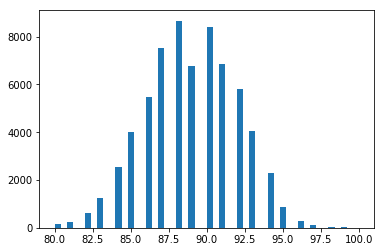

In [96]:
plt.hist(reviews['points'], 50)
plt.show()

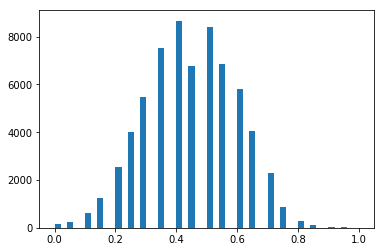

In [97]:
plt.hist(sc1_data, 50)
plt.show()

## Немного нормализации данных

In [98]:
sc3 = Normalizer(norm='l1')
sc3_data = sc3.fit_transform([[1, 9], [2, 8]])

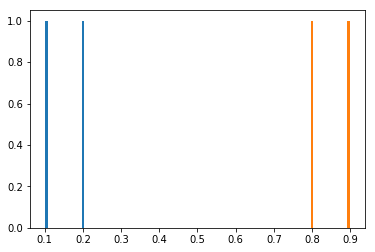

In [99]:
plt.hist(sc3_data, 50)
plt.show()

In [100]:
sc3_data

array([[0.1, 0.9],
       [0.2, 0.8]])

Готово.

# оо...